In [1]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [2]:
!ls "/gdrive/My Drive/jeju"

201901-202003.csv  process_data.csv  submission.csv


In [ ]:
import pandas as pd
import numpy as np
file_path = "/gdrive/My Drive/jeju/"
data = pd.read_csv(file_path+'201901-202003.csv')
data.shape

(24697792, 12)

# 변수 설명¶
- CARD ~ : 카드 이용 지역
- HOM ~ : 카드 사용자 거주지역
- STD_CLSS_NM : 업종명
- SEX_CTGO_CD : 성별(1:남, 2:여)
- FLC : 가구생애주기(1: 1인가구, 2: 영유아자녀가구, 3: 중고생자녀가구, 4: 성인자녀가구, 5: 노년가구)
- CSTMR_CNT : 이용고객수(명)
- AMT : 이용금액(원)
- CNT : 이용건수(건)

In [ ]:
data.dtypes

REG_YYMM         int64
CARD_SIDO_NM    object
CARD_CCG_NM     object
STD_CLSS_NM     object
HOM_SIDO_NM     object
HOM_CCG_NM      object
AGE             object
SEX_CTGO_CD      int64
FLC              int64
CSTMR_CNT        int64
AMT              int64
CNT              int64
dtype: object

In [ ]:
# 결측치 확인
data.isnull().sum()

# CARD_CCG_NM : 카드이용지역 시군구(가맹점 주소기준) 결측치가 많다
# HOM_CCG_NM : 카드이용자 거주 주소 시군구 결측치가 많다

REG_YYMM             0
CARD_SIDO_NM         0
CARD_CCG_NM      87213
STD_CLSS_NM          0
HOM_SIDO_NM          0
HOM_CCG_NM      147787
AGE                  0
SEX_CTGO_CD          0
FLC                  0
CSTMR_CNT            0
AMT                  0
CNT                  0
dtype: int64

In [ ]:
# 결측치 있는 데이터를 우선 봐보자
data[data['CARD_CCG_NM'].isnull()]

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
1243710,201901,세종,NaN,건강보조식품 소매업,세종,NaN,30s,1,2,14,2737050,17
1243711,201901,세종,NaN,건강보조식품 소매업,세종,NaN,30s,2,2,14,2595350,14
1243712,201901,세종,NaN,건강보조식품 소매업,세종,NaN,40s,1,3,13,2531950,11
1243713,201901,세종,NaN,건강보조식품 소매업,세종,NaN,40s,2,3,11,2118425,12
1243714,201901,세종,NaN,건강보조식품 소매업,세종,NaN,50s,1,4,21,3025500,23
...,...,...,...,...,...,...,...,...,...,...,...,...
24409418,202003,세종,NaN,화장품 및 방향제 소매업,충북,청주시 흥덕구,40s,2,3,5,88700,5
24409419,202003,세종,NaN,화장품 및 방향제 소매업,충북,청주시 흥덕구,50s,1,4,3,62400,3
24409420,202003,세종,NaN,화장품 및 방향제 소매업,충북,청주시 흥덕구,50s,2,4,10,494800,11
24409421,202003,세종,NaN,화장품 및 방향제 소매업,충북,청주시 흥덕구,60s,2,5,10,623100,10


In [ ]:
# 세종시 데이터가 누락된 것 같으니 세종에 해당하는 데이터개수 추출 후 결측치 개수와 비교해보기
sejong_df = data.loc[data['CARD_SIDO_NM'] == '세종']
sejong_df.shape

# raw data의 'CARD_CCG_NM' 누락 데이터에 해당하는 시도는 '세종'이다!

(87213, 12)

In [ ]:
sejong_df[sejong_df.isnull()].shape

(87213, 12)

In [ ]:
data.loc[data['HOM_CCG_NM'].isnull()]

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
420,201901,강원,강릉시,과실 및 채소 소매업,세종,NaN,30s,1,2,3,58000,3
421,201901,강원,강릉시,과실 및 채소 소매업,세종,NaN,40s,1,3,3,263000,4
1189,201901,강원,강릉시,기타 대형 종합 소매업,세종,NaN,20s,1,1,3,176540,3
1190,201901,강원,강릉시,기타 대형 종합 소매업,세종,NaN,20s,2,1,4,234880,6
1191,201901,강원,강릉시,기타 대형 종합 소매업,세종,NaN,30s,1,2,4,177640,5
...,...,...,...,...,...,...,...,...,...,...,...,...
24697496,202003,충북,충주시,한식 음식점업,세종,NaN,30s,2,2,5,188500,8
24697497,202003,충북,충주시,한식 음식점업,세종,NaN,40s,1,3,18,1056500,28
24697498,202003,충북,충주시,한식 음식점업,세종,NaN,50s,1,4,25,770150,35
24697499,202003,충북,충주시,한식 음식점업,세종,NaN,50s,2,4,4,19500,4


In [ ]:
sejong_hom_df = data.loc[data['HOM_SIDO_NM'] == '세종']
print(sejong_hom_df.head())
sejong_hom_df.shape

      REG_YYMM CARD_SIDO_NM CARD_CCG_NM  ... CSTMR_CNT     AMT CNT
420     201901           강원         강릉시  ...         3   58000   3
421     201901           강원         강릉시  ...         3  263000   4
1189    201901           강원         강릉시  ...         3  176540   3
1190    201901           강원         강릉시  ...         4  234880   6
1191    201901           강원         강릉시  ...         4  177640   5

[5 rows x 12 columns]


(147787, 12)

In [ ]:

miss_df = sejong_hom_df[sejong_hom_df.isnull()]
miss_df.shape

# 거주지역이 세종인 카드사용자의 시군구 데이터(HOM_CCG_NM) 결측치와 raw data의 HOM_CCG_NM 결측치와 일치.
# 그러므로 결측치값은 모두 세종에 대한 시군구 데이터

(147787, 12)

# 세종특별자치시
- 세종특별자치시는 현재 '시군구'가 따로 존재하지 않음
- 아직 읍,면,행정동 밖에 없는 상태
- 이러한 이유 때문에 '시군구'를 나타내는 CARD_CCG_NM, HOM_CCG_NM 이 결측치이다.
- 결측치를 위한 대체값은 '세종시'로 결정

In [ ]:
# 결측치 대체 완료
data['CARD_CCG_NM'] = data['CARD_CCG_NM'].fillna('세종시')
data['HOM_CCG_NM'] = data['HOM_CCG_NM'].fillna('세종시')
data.isnull().sum()

REG_YYMM        0
CARD_SIDO_NM    0
CARD_CCG_NM     0
STD_CLSS_NM     0
HOM_SIDO_NM     0
HOM_CCG_NM      0
AGE             0
SEX_CTGO_CD     0
FLC             0
CSTMR_CNT       0
AMT             0
CNT             0
dtype: int64

In [ ]:
# 다시 원본 데이터로드 시간 줄이기 위해 복사본으로 할당해놓기
credit_df = data.copy()
credit_df.dtypes

REG_YYMM         int64
CARD_SIDO_NM    object
CARD_CCG_NM     object
STD_CLSS_NM     object
HOM_SIDO_NM     object
HOM_CCG_NM      object
AGE             object
SEX_CTGO_CD      int64
FLC              int64
CSTMR_CNT        int64
AMT              int64
CNT              int64
dtype: object

In [ ]:
credit_df.head(2)

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8


In [ ]:
# 연월칼럼 datetime으로 바꿔주기
# 우선 string 형태로 바꿔주기
credit_df['REG_YYMM'] = credit_df['REG_YYMM'].astype(str)

In [ ]:
credit_df.head()

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8
2,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6
3,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5
4,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3


In [ ]:
# 날짜 value에 '-' 문자열 넣어줘서 새로운 변수로 추가
date_list = [] 
datetimes = credit_df['REG_YYMM'].tolist()
for datetime in datetimes:
  date = datetime[:4] + '-' + datetime[4:]
  date_list.append(date)

In [ ]:
credit_df['Datetime'] = pd.Series(date_list)
credit_df['Datetime'] = pd.to_datetime(credit_df['Datetime'])

In [ ]:
# '년-월' 형태로 바꿔주고 기존 날짜 변수명 삭제
credit_df['Datetime'] = credit_df['Datetime'].dt.strftime('%Y-%m')
del credit_df['REG_YYMM']
credit_df.head()

,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT,Datetime
0,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4,2019-01
1,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8,2019-01
2,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6,2019-01
3,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5,2019-01
4,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3,2019-01


In [ ]:
# AGE(연령) 변수 종류 보기
credit_df['AGE'].value_counts()

40s    5802447
30s    5550519
20s    5091675
50s    4455687
60s    2606168
70s     876622
10s     314674
Name: AGE, dtype: int64

In [ ]:
# 전처리한 파일 메모리 부족 문제 야기시킬 수 있으므로 csv파일로 개별 저장
credit_df.to_csv('/gdrive/My Drive/jeju/process_data.csv')

In [1]:
import pandas as pd
import numpy as np
file_path = "/gdrive/My Drive/jeju/"
data = pd.read_csv(file_path+'process_data.csv')
data.shape

(24697792, 13)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid',
        font='Malgun Gothic',
        rc={'axes.unicode_minus':False})

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
del data['Unnamed: 0']
data.head(2)

,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT,Datetime
0,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4,2019-01
1,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8,2019-01


findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


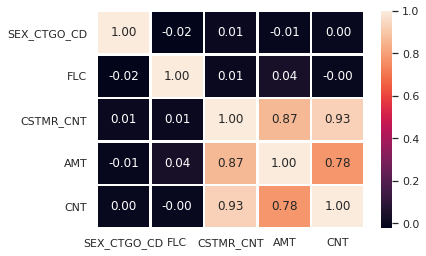

In [8]:
sns.heatmap(data = data.corr(), annot=True, fmt='.2f', linewidths=1.5)

In [16]:
# 전국 업종 개수 내림차순으로 정렬
data['STD_CLSS_NM'].value_counts().sort_values(ascending=False)

한식 음식점업                  3697166
체인화 편의점                  3210466
슈퍼마켓                     1630700
차량용 주유소 운영업              1613476
비알콜 음료점업                 1586120
기타 대형 종합 소매업             1495163
서양식 음식점업                 1404839
피자 햄버거 샌드위치 및 유사 음식점업    1351478
빵 및 과자류 소매업               989794
중식 음식점업                   698803
기타음식료품위주종합소매업             558716
기타 외국식 음식점업               556813
일식 음식점업                   539071
과실 및 채소 소매업               504479
스포츠 및 레크레이션 용품 임대업        466533
화장품 및 방향제 소매업             383713
택시 운송업                    381993
그외 기타 종합 소매업              351817
여관업                       334994
전시 및 행사 대행업               330569
육류 소매업                    327160
욕탕업                       259567
수산물 소매업                   255488
골프장 운영업                   236554
차량용 가스 충전업                218242
버스 운송업                    192281
일반유흥 주점업                  174081
호텔업                       155309
면세점                       144349
정기 항공 운송업                 115914
휴양콘도 운영업  

In [3]:
# 카드 사용지역 별로 나누어보자
# 강원도 지역만 선별
kangwon_df = data.loc[data['CARD_SIDO_NM'] == '강원'] 
kangwon_df.shape

(1230355, 12)

In [4]:
# 강원도에는 카드 사용 횟수가 가장 많은 시군구가 어디인지 알아보기
kangwon_gun_df = kangwon_df.groupby(['CARD_CCG_NM'])['CNT'].sum().sort_values(ascending=False)
kangwon_gun_df

CARD_CCG_NM
원주시    16008790
춘천시    12144927
강릉시    10294621
속초시     5071724
홍천군     3524663
동해시     3414706
삼척시     2024675
평창군     1933807
횡성군     1742398
인제군     1310443
철원군     1188868
정선군     1009942
태백시      922249
양양군      864533
화천군      858550
고성군      754284
영월군      681040
양구군      632309
Name: CNT, dtype: int64

In [5]:
# 시각화하기
kangwon_gun_df = pd.DataFrame(kangwon_gun_df)
kangwon_gun_df.head()

,CNT
CARD_CCG_NM,
원주시,16008790
춘천시,12144927
강릉시,10294621
속초시,5071724
홍천군,3524663


In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
 
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum
import matplotlib.font_manager as fm
import matplotlib as mpl
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 77 not upgraded.


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


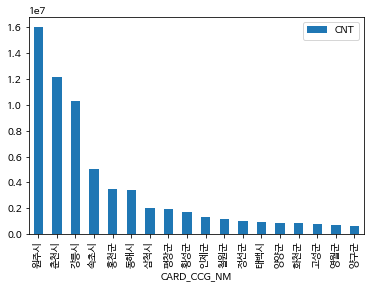

In [21]:
plt.rc('font', family='NanumBarunGothic') 
kangwon_gun_df.plot.bar()

In [10]:
# 업종별로 얼마나 이용건수가 많은지 보기
upjong = kangwon_df.groupby(['STD_CLSS_NM'])['CNT'].sum().sort_values(ascending=False)
upjong = pd.DataFrame(upjong)
upjong

,CNT
STD_CLSS_NM,
체인화 편의점,19112215
한식 음식점업,11634749
슈퍼마켓,7841816
차량용 주유소 운영업,4511515
기타음식료품위주종합소매업,3795489
기타 대형 종합 소매업,3023973
비알콜 음료점업,2171921
피자 햄버거 샌드위치 및 유사 음식점업,2076827
서양식 음식점업,2058982


In [54]:
# 강원도 지역 내에서 신용카드가 가장 많이 사용된 소매업이 어떤 종류인지 보기
gu_upjong = kangwon_df.groupby(['CARD_CCG_NM','STD_CLSS_NM'])['STD_CLSS_NM'].count().sort_values(ascending=False)
gu_upjong = pd.DataFrame(gu_upjong)
gu_upjong

,,STD_CLSS_NM
CARD_CCG_NM,STD_CLSS_NM,
홍천군,슈퍼마켓,29764
원주시,체인화 편의점,24953
강릉시,한식 음식점업,24490
원주시,한식 음식점업,22551
홍천군,한식 음식점업,22543
...,...,...
삼척시,호텔업,1
인제군,내항 여객 운송업,1
강릉시,택시 운송업,1


In [22]:
data.head()

,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT,Datetime
0,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4,2019-01
1,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8,2019-01
2,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6,2019-01
3,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5,2019-01
4,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3,2019-01
